In [1]:
# ============================================================
# Sentiment Analysis using Logistic Regression on Movie Reviews
# ============================================================

# 1. Install & Import Required Libraries
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Download NLTK movie_reviews dataset if not already
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [2]:
# 2. Load Movie Reviews into a DataFrame
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

df = pd.DataFrame(documents, columns=['review','label'])
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (2000, 2)
                                              review label
0  plot : two teen couples go to a church party ,...   neg
1  the happy bastard's quick movie review \ndamn ...   neg
2  it is movies like these that make a jaded movi...   neg
3   " quest for camelot " is warner bros . ' firs...   neg
4  synopsis : a mentally unstable man undergoing ...   neg


In [3]:
# 3. Encode Labels (pos=1, neg=0)
df['label'] = df['label'].map({'pos':1, 'neg':0})

In [4]:
# 4. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['label'], test_size=0.2, random_state=42, stratify=df['label'])

In [5]:
# 5. Text Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [6]:
# 6. Initialize & Train Logistic Regression Model
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=200)

In [7]:
# 7. Predictions
y_pred = model.predict(X_test_tfidf)

In [8]:
# 8. Evaluate Model
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative','Positive']))


Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.80      0.82       200
    Positive       0.81      0.86      0.83       200

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



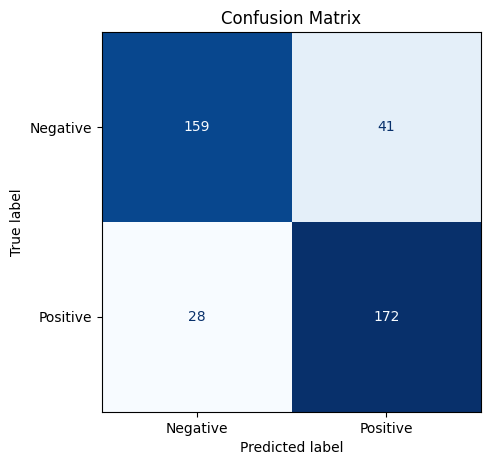

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative','Positive'])
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(cmap='Blues', ax=ax, colorbar=False)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix_sentiment.png', dpi=300)
plt.show()

/tmp/ipython-input-1945471993.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='pastel')


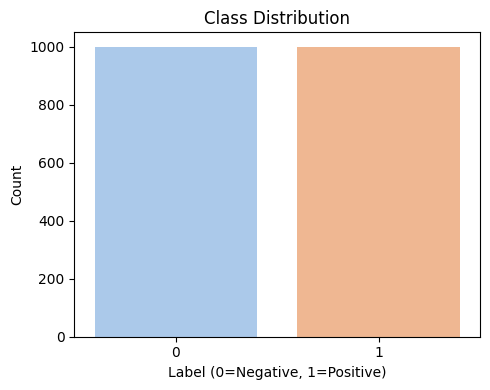

In [10]:
# 9. Visualize Class Distribution (Extra for Portfolio)
plt.figure(figsize=(5,4))
sns.countplot(x='label', data=df, palette='pastel')
plt.title('Class Distribution')
plt.xlabel('Label (0=Negative, 1=Positive)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300)
plt.show()


In [11]:
# 10. Test on Custom Reviews
sample_reviews = [
    "This movie was fantastic! I loved the acting and the story.",
    "Terrible film. Waste of time and money.",
    "The plot was okay, but the characters were amazing!"
]
sample_tfidf = vectorizer.transform(sample_reviews)
sample_preds = model.predict(sample_tfidf)
for review, pred in zip(sample_reviews, sample_preds):
    sentiment = "Positive" if pred==1 else "Negative"
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Review: This movie was fantastic! I loved the acting and the story.
Predicted Sentiment: Positive

Review: Terrible film. Waste of time and money.
Predicted Sentiment: Negative

Review: The plot was okay, but the characters were amazing!
Predicted Sentiment: Negative



In [12]:
# 11. Completion Message
print("✅ Sentiment Analysis complete! Accuracy, confusion matrix, and sample predictions generated.")

✅ Sentiment Analysis complete! Accuracy, confusion matrix, and sample predictions generated.
